# **Model 1 (polynomial regression)**

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd


In [73]:
data: pd.DataFrame = pd.read_csv("data.csv", index_col=0)
print(data.head())

          y        x1        x2        x3        x4        x5        x6  \
0  7.824944 -0.887890  0.949137  0.867185  0.905457 -0.564753  1.064772   
1 -0.284809  0.402109 -0.109812  0.353789 -0.368996  0.484929 -0.872589   
2 -5.551631 -0.114545 -1.603722  0.284455 -0.276847 -1.421414 -1.135600   
3  0.087262  0.832631  0.443724  0.472880  1.260798  0.589971 -0.150165   
4  0.169201  0.318175 -0.042458  0.014656  0.323378  0.425665  0.268726   

         x7        x8        x9       x10  
0  0.871957  0.073367 -0.468684 -1.518201  
1 -0.305881 -0.284581  0.547374 -0.755235  
2 -0.021529 -0.826239  0.647715 -2.370580  
3  1.148314  1.034029 -0.205375 -0.488831  
4  0.177851 -0.128694  0.110501  0.797469  


In [74]:
data_copy = data.copy()
X = data_copy['x1']
y = data_copy['y']

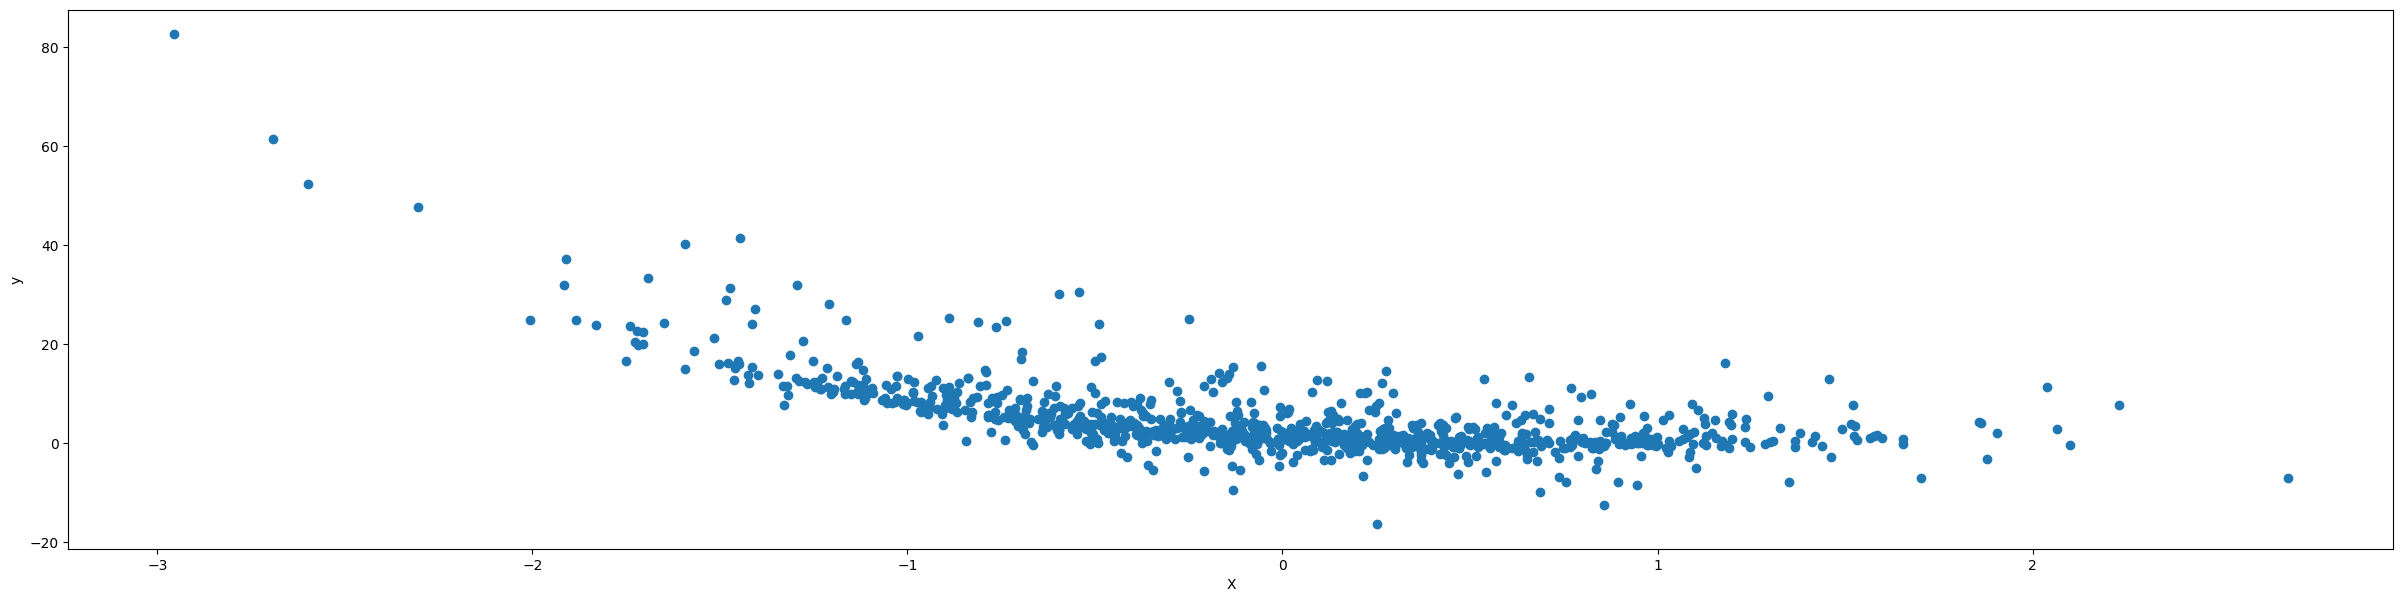

In [75]:
plt.figure(figsize = (30,7))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [76]:
splitter = int(0.8 * len(X))
X_train, y_train = X[:splitter], y[:splitter]
X_test, y_test = X[splitter:], y[splitter:]

print(f"Train Length: {len(X_train)}")
print(f"Test Length: {len(X_test)}")

Train Length: 800
Test Length: 200


In [77]:
def plot_predictions(train_data: torch.Tensor,
                     train_labels: torch.Tensor,
                     test_data: torch.Tensor,
                     test_labels: torch.Tensor,
                     predictions: torch.Tensor = None):
    plt.figure(figsize=(5, 2))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14});

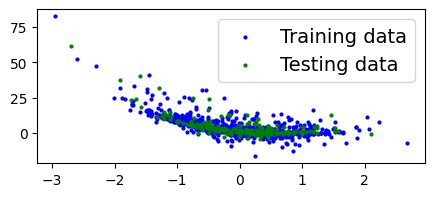

In [78]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

In [79]:
X_train=torch.tensor(X_train)
y_train=torch.tensor(y_train)
# X_test=torch.tensor(X_test.to_numpy())
lr = LinearRegression()
X_train=X_train.reshape(800,1)
y_train=y_train.reshape(800,1)
lr.fit(X_train, y_train)
# y_pred = lr.predict(X_test)
# print(r2_score(y_test, y_pred))

LinearRegression()

In [80]:
X_test = X_test.to_numpy()
X_test = X_test.reshape(200, 1)
X_test=torch.tensor(X_test)
y_pred = lr.predict(X_test)
print(r2_score(y_test, y_pred))

0.3901628758722331


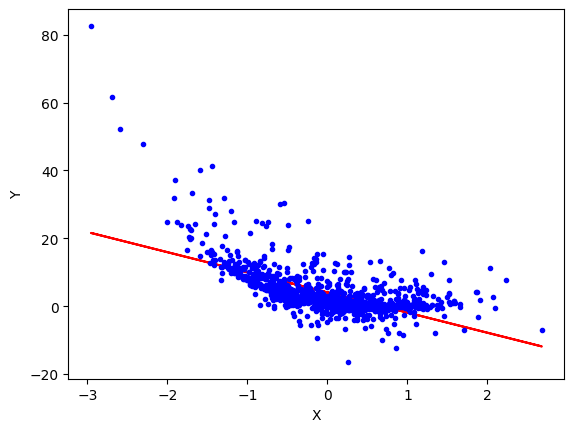

In [81]:
plt.plot(X_train, lr.predict(X_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [82]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(X_train)
x_test_trans = poly.transform(X_test)
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.6902358496587294


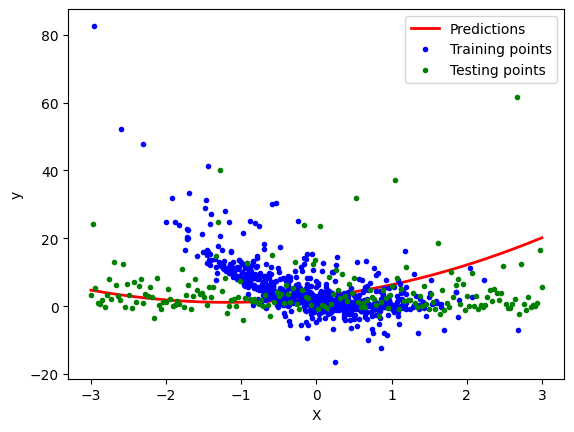

In [163]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_test, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# **Model 2**

In [84]:
data_copy = data.copy()
X = data_copy['x2']
y = data_copy['y']

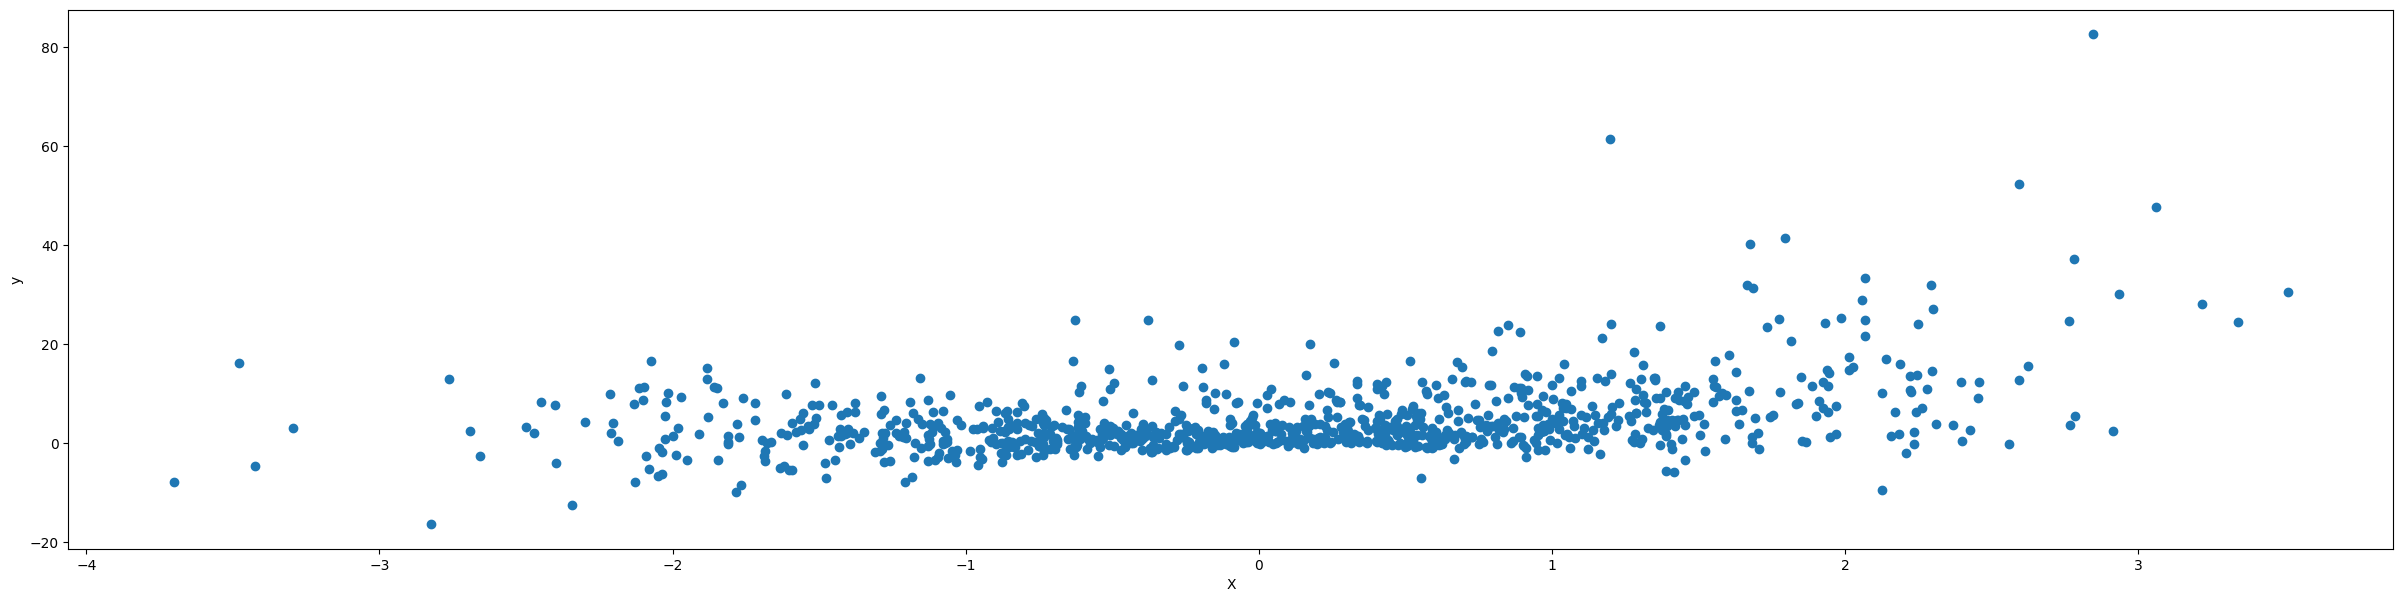

In [85]:
plt.figure(figsize = (30,7))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [86]:
splitter = int(0.8 * len(X))
X_train, y_train = X[:splitter], y[:splitter]
X_test, y_test = X[splitter:], y[splitter:]

print(f"Train Length: {len(X_train)}")
print(f"Test Length: {len(X_test)}")

Train Length: 800
Test Length: 200


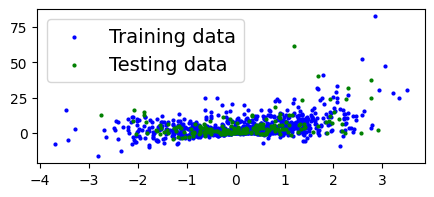

In [87]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

In [88]:
X_train=torch.tensor(X_train)
y_train=torch.tensor(y_train)
# X_test=torch.tensor(X_test.to_numpy())
lr = LinearRegression()
X_train=X_train.reshape(800,1)
y_train=y_train.reshape(800,1)
lr.fit(X_train, y_train)
# y_pred = lr.predict(X_test)
# print(r2_score(y_test, y_pred))

LinearRegression()

In [89]:
X_test = X_test.to_numpy()
X_test = X_test.reshape(200, 1)
X_test=torch.tensor(X_test)
y_pred = lr.predict(X_test)
print(r2_score(y_test, y_pred))

0.11376537340970283


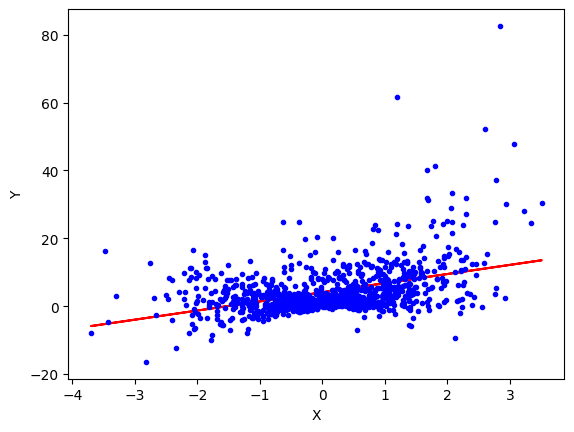

In [90]:
plt.plot(X_train, lr.predict(X_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [91]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(X_train)
x_test_trans = poly.transform(X_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.2100087294119095


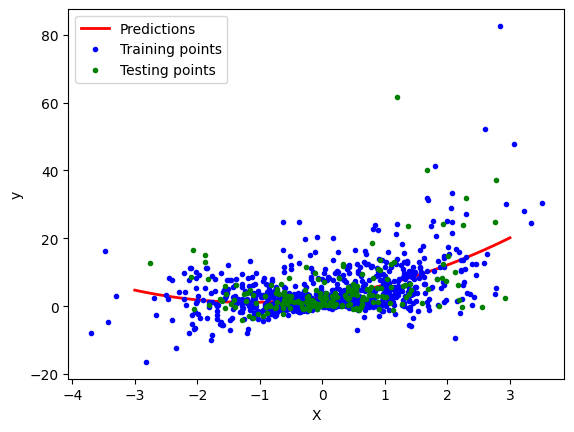

In [92]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# **Model 3 (linear regression)**

specifying certain column

In [93]:
data_copy = data.copy()
X = data_copy['x3']
y = data_copy['y']

In [94]:
print(X)

0      0.867185
1      0.353789
2      0.284455
3      0.472880
4      0.014656
         ...   
995   -0.285002
996   -0.029521
997   -0.723684
998   -1.654938
999    0.735014
Name: x3, Length: 1000, dtype: float64


plotting the inputs and outputs

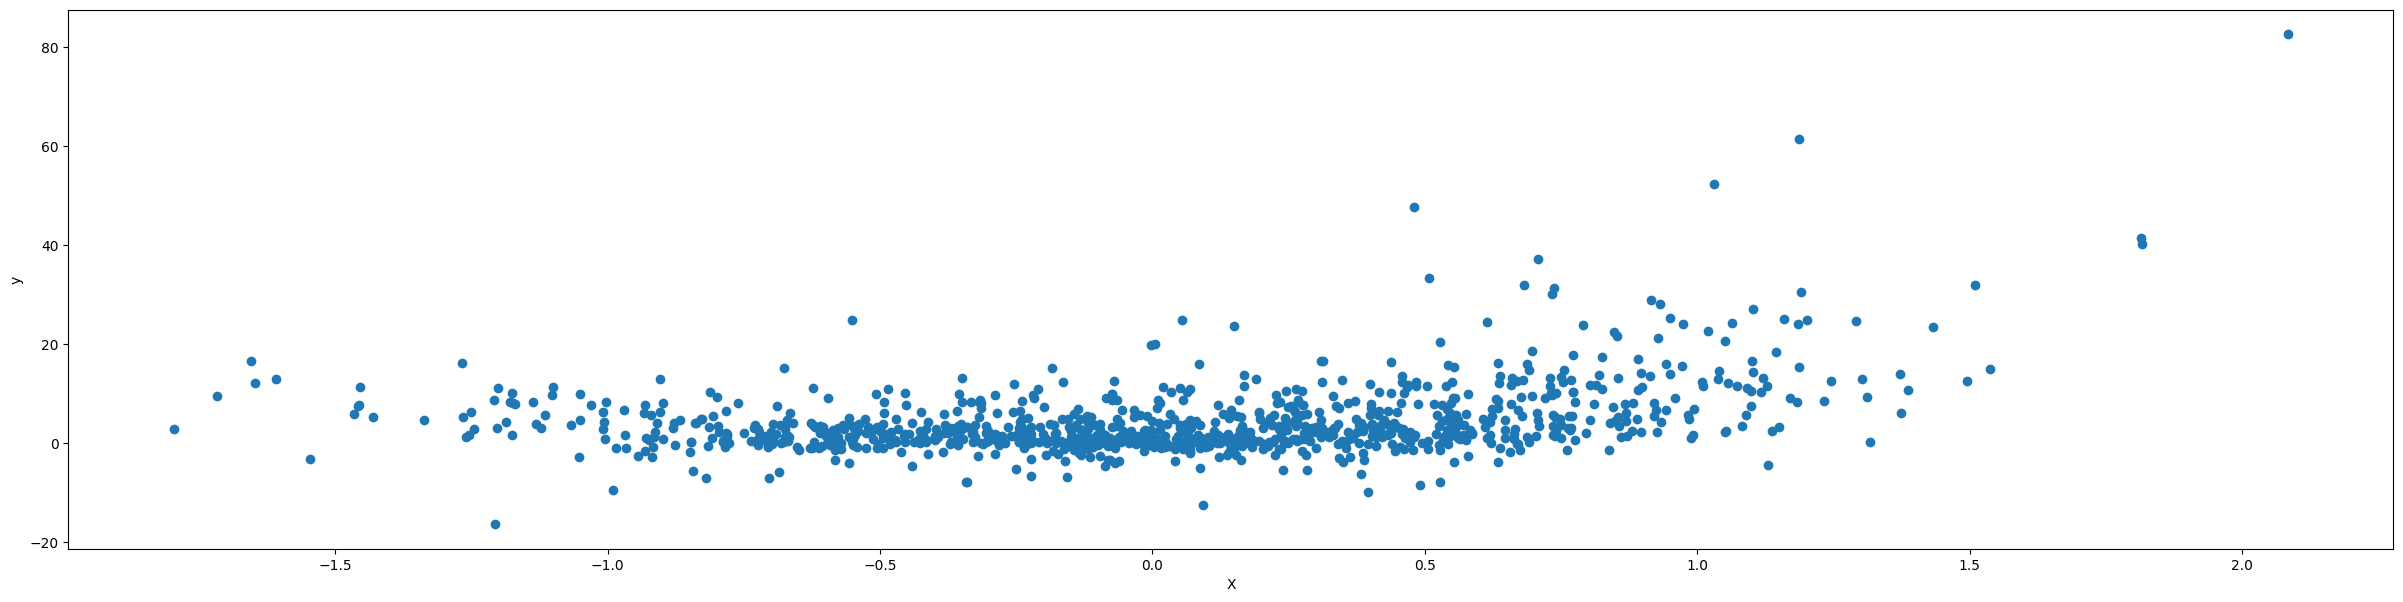

In [95]:
plt.figure(figsize = (30,7))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

splitting the data into train and test

In [96]:
splitter = int(0.8 * len(X))
X_train, y_train = X[:splitter], y[:splitter]
X_test, y_test = X[splitter:], y[splitter:]

print(f"Train Length: {len(X_train)}")
print(f"Test Length: {len(X_test)}")

Train Length: 800
Test Length: 200


plotting the train and test data

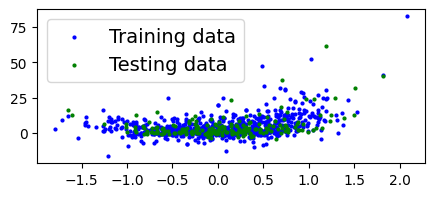

In [97]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

implementing a linear regression model with one weight and one bias parameter.

In [98]:
# Build Model
import torch
import torch.nn as nn
class LinearRegressionModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))
        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))
    def forward(self, x: torch.Tensor):
        y = x * self.weights + self.bias #  as the formula (y = x * w + b)
        return y

In [99]:
model_0 = LinearRegressionModel()
print(f"Model_0 Parameters: {list(model_0.parameters())}")
print("---------")
print(f"Named Parameters: {model_0.state_dict()}")

Model_0 Parameters: [Parameter containing:
tensor([-0.7672], requires_grad=True), Parameter containing:
tensor([0.5347], requires_grad=True)]
---------
Named Parameters: OrderedDict([('weights', tensor([-0.7672])), ('bias', tensor([0.5347]))])


In [100]:

X_test = torch.tensor(X_test.to_numpy())
with torch.inference_mode():
    
    y_preds = model_0(X_test)
    y_preds=torch.tensor(y_preds)

print(f"Predicted value: {y_preds}")

Predicted value: tensor([ 7.2025e-01, -2.8092e-01,  1.4178e-02,  7.6013e-01,  3.3683e-01,
         3.5350e-01,  1.0705e+00,  7.9577e-01, -1.4190e-01, -1.5262e-01,
         1.7687e+00,  1.4941e+00,  7.2281e-01,  4.1278e-01, -4.2034e-01,
         5.5766e-01, -1.8844e-01,  1.1586e+00,  5.9770e-01,  7.7626e-01,
         9.8357e-01,  9.1247e-01,  1.1178e+00,  4.6608e-01, -1.0018e-02,
         1.1237e-01,  1.0695e-01,  2.1413e-01,  5.9433e-01,  7.1800e-01,
         2.6763e-01,  1.0045e+00,  7.5274e-01,  5.3796e-01,  4.2750e-01,
         5.3627e-01,  1.5569e-01,  8.5406e-01,  9.9416e-01,  1.2243e+00,
         4.9580e-01,  9.0396e-01,  1.3077e-01,  7.3095e-01,  6.4731e-01,
         1.0051e+00,  2.5939e-01,  6.8930e-02,  1.0588e+00,  1.0493e+00,
         3.1393e-01,  5.8786e-01,  5.5225e-01,  1.8258e-01,  3.2352e-01,
        -4.4921e-02, -4.5612e-01, -8.5921e-01, -1.1727e-01,  3.5492e-01,
         2.3890e-01,  3.7065e-01,  5.3560e-01,  3.2074e-01,  3.9291e-03,
         5.2416e-01,  2.7563e-01, 

C:\Users\DELL\AppData\Local\Temp\ipykernel_12376\337032707.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_preds=torch.tensor(y_preds)


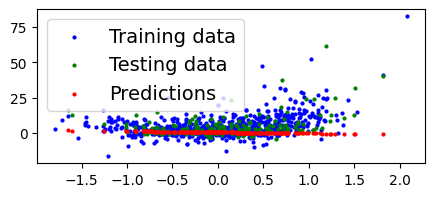

In [101]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [102]:
# y_preds=torch.tensor(y_preds)
y_test=torch.tensor(y_test.to_numpy())
print(f"Loss in one parameter: {y_preds[0] - y_test[0]}")

Loss in one parameter: -2.6053843123321254


In [103]:
loss_function = nn.L1Loss()

creating Stochastic gradient descent optimizer

In [104]:
optimizer = torch.optim.SGD(model_0.parameters(), # model parameters to optimize
                              lr=0.001, # learning rate (how fast the model learns)
                            )

In [105]:
def train(
        model: nn.Module,
        train_data: torch.Tensor,
        train_labels: torch.Tensor,
        test_data: torch.Tensor,
        test_labels: torch.Tensor,
        loss_function: nn.Module,
        optimizer: torch.optim.Optimizer,
        epochs: int,
    ):
    epochs_count ,train_loss_arr, test_loss_arr = [], [], []
    for epoch in range(epochs+1):
        model.train()
        y_pred = model(train_data)
        loss = loss_function(y_pred, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.inference_mode():
            y_pred = model(test_data)
            test_loss = loss_function(y_pred, test_labels)

        if epoch % 10 == 0:
            epochs_count.append(epoch)
            train_loss_arr.append(loss.detach().numpy())
            test_loss_arr.append(test_loss.detach().numpy())
            print(f"Epoch {epoch}: MAE Loss: {loss.item():0.2f} | Test Loss: {test_loss.item():0.2f}")
    return epochs_count, train_loss_arr, test_loss_arr

In [106]:
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [107]:
X_train = torch.tensor(X_train)
y_train=torch.tensor(y_train)
epochs_count, train_loss, test_loss = train(
                                        model_0, 
                                        train_data=X_train, 
                                        train_labels=y_train, 
                                        test_data=X_test, 
                                        test_labels=y_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer, 
                                        epochs=1000
                                    )

Epoch 0: MAE Loss: 4.96 | Test Loss: 4.59
Epoch 10: MAE Loss: 4.95 | Test Loss: 4.59
Epoch 20: MAE Loss: 4.95 | Test Loss: 4.59
Epoch 30: MAE Loss: 4.95 | Test Loss: 4.58
Epoch 40: MAE Loss: 4.95 | Test Loss: 4.58
Epoch 50: MAE Loss: 4.95 | Test Loss: 4.58
Epoch 60: MAE Loss: 4.94 | Test Loss: 4.58
Epoch 70: MAE Loss: 4.94 | Test Loss: 4.58
Epoch 80: MAE Loss: 4.94 | Test Loss: 4.57
Epoch 90: MAE Loss: 4.94 | Test Loss: 4.57
Epoch 100: MAE Loss: 4.94 | Test Loss: 4.57
Epoch 110: MAE Loss: 4.94 | Test Loss: 4.57
Epoch 120: MAE Loss: 4.93 | Test Loss: 4.57
Epoch 130: MAE Loss: 4.93 | Test Loss: 4.56
Epoch 140: MAE Loss: 4.93 | Test Loss: 4.56
Epoch 150: MAE Loss: 4.93 | Test Loss: 4.56
Epoch 160: MAE Loss: 4.93 | Test Loss: 4.56
Epoch 170: MAE Loss: 4.93 | Test Loss: 4.56
Epoch 180: MAE Loss: 4.92 | Test Loss: 4.55
Epoch 190: MAE Loss: 4.92 | Test Loss: 4.55
Epoch 200: MAE Loss: 4.92 | Test Loss: 4.55
Epoch 210: MAE Loss: 4.92 | Test Loss: 4.55
Epoch 220: MAE Loss: 4.92 | Test Loss: 4.55

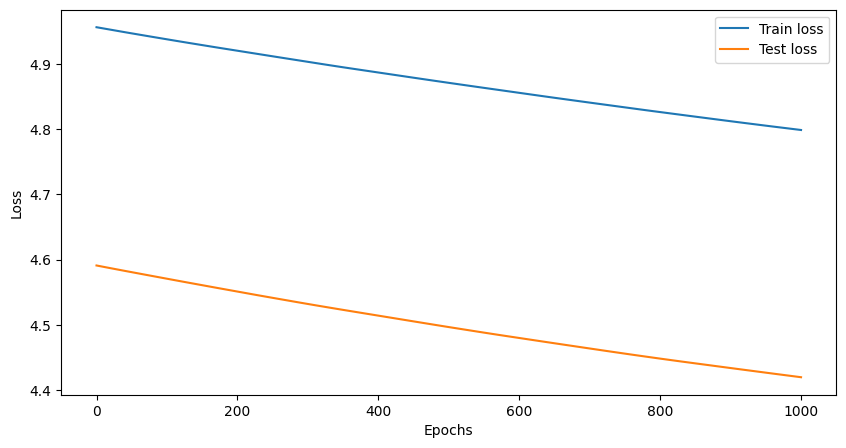

In [108]:
plot_stats(epochs_count, train_loss, test_loss)

In [109]:
def predict(model, X):
    with torch.inference_mode():
        y_pred = model(X)
        return y_pred

In [110]:
y_preds = predict(model_0, X_test)

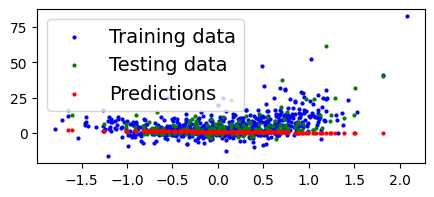

In [111]:
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_preds,
)

# **Model 4 (linear regression)**

In [112]:
data_copy = data.copy()
X = data_copy['x4']
y = data_copy['y']

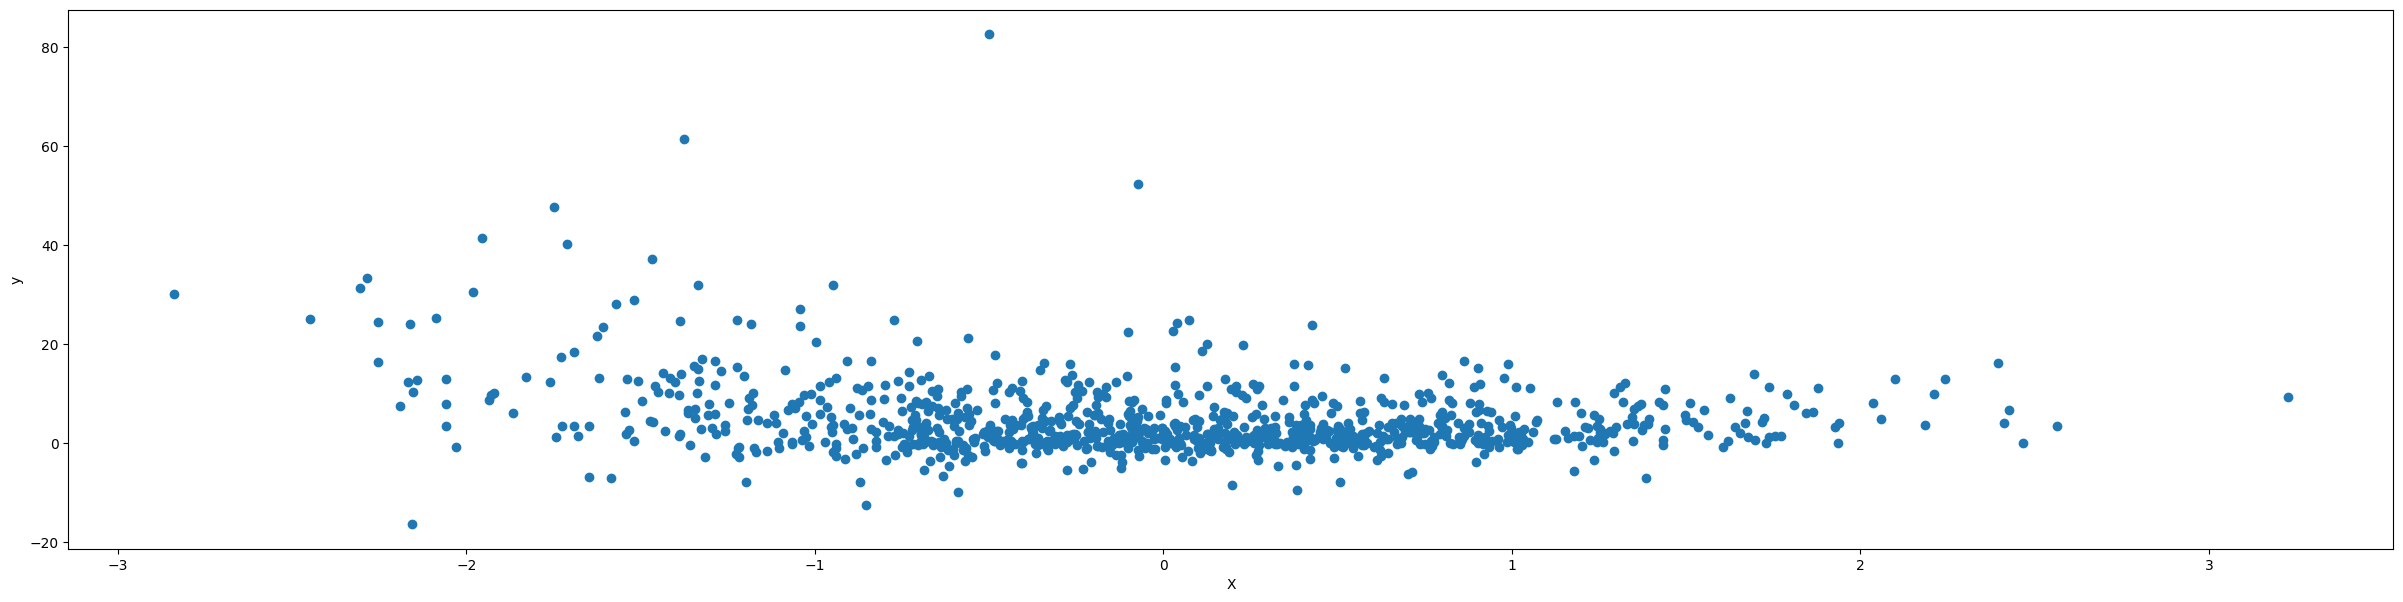

In [113]:
plt.figure(figsize = (30,7))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [114]:
splitter = int(0.8 * len(X))
X_train, y_train = X[:splitter], y[:splitter]
X_test, y_test = X[splitter:], y[splitter:]

print(f"Train Length: {len(X_train)}")
print(f"Test Length: {len(X_test)}")

Train Length: 800
Test Length: 200


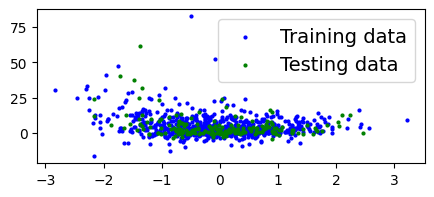

In [115]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

In [116]:
model_1= LinearRegressionModel()
print(f"Model_1 Parameters: {list(model_1.parameters())}")
print("---------")
print(f"Named Parameters: {model_1.state_dict()}")

Model_1 Parameters: [Parameter containing:
tensor([0.8629], requires_grad=True), Parameter containing:
tensor([0.3008], requires_grad=True)]
---------
Named Parameters: OrderedDict([('weights', tensor([0.8629])), ('bias', tensor([0.3008]))])


In [117]:
X_test = torch.tensor(X_test.to_numpy())
with torch.inference_mode():
    
    y_preds = model_1(X_test)
    y_preds=torch.tensor(y_preds)

print(f"Predicted value: {y_preds}")

Predicted value: tensor([-0.0217,  0.3333,  0.5760,  0.5321,  1.1288, -0.3554, -0.3194,  1.7166,
        -0.3059, -0.2556,  2.1113,  1.0760,  0.5673, -0.2983, -0.3555,  0.6340,
        -0.2373,  1.1389,  0.6031, -0.2577,  0.2986,  1.8914,  2.0568,  0.1335,
         0.7320, -0.3013,  1.5927,  0.1676, -0.3869,  0.7868,  0.0545,  0.1663,
         0.8455,  1.7473,  0.2313, -0.3452,  0.5290,  0.8382,  0.5226,  0.4362,
        -0.4577, -0.6193, -0.3775, -1.0313, -0.5770,  0.5535, -0.7737,  0.1464,
         0.8353,  0.3284, -0.0234, -0.0964, -0.3153,  0.7600,  0.2930, -0.0058,
        -0.8955, -1.1756,  0.1604, -0.6018,  0.3907,  1.3748,  0.0809,  1.7277,
        -0.6190,  0.9581, -0.2727,  1.0758, -0.9332,  2.2370,  1.2162,  0.3756,
         1.3888, -0.1119, -0.2413,  0.4112, -0.3050,  0.8559,  1.0985,  0.3470,
         1.0808,  0.1876,  1.2231,  1.5425,  1.1043,  0.4179,  0.9905,  0.6447,
         0.4738,  0.4742, -1.0958,  0.9255,  0.3056,  2.0777, -1.5649, -0.3207,
        -0.2052, -0.273

C:\Users\DELL\AppData\Local\Temp\ipykernel_12376\188834858.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_preds=torch.tensor(y_preds)


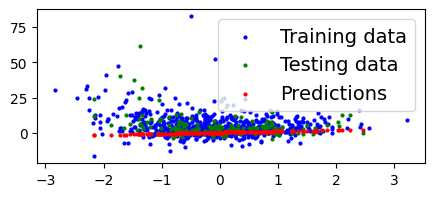

In [118]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [119]:
# y_preds=torch.tensor(y_preds)
y_test=torch.tensor(y_test.to_numpy())
print(f"Loss in one parameter: {y_preds[0] - y_test[0]}")

Loss in one parameter: -3.347342840996906


In [120]:
loss_function = nn.L1Loss()

In [121]:
optimizer = torch.optim.SGD(model_1.parameters(), # model parameters to optimize
                              lr=0.001, # learning rate (how fast the model learns)
)

In [122]:
X_train = torch.tensor(X_train)
y_train=torch.tensor(y_train)
X_test = torch.tensor(X_test)
epochs_count, train_loss, test_loss = train(
                                        model_1, 
                                        train_data=X_train, 
                                        train_labels=y_train, 
                                        test_data=X_test, 
                                        test_labels=y_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer, 
                                        epochs=1000
                                    )

Epoch 0: MAE Loss: 5.03 | Test Loss: 4.68
Epoch 10: MAE Loss: 5.03 | Test Loss: 4.67
Epoch 20: MAE Loss: 5.02 | Test Loss: 4.67
Epoch 30: MAE Loss: 5.02 | Test Loss: 4.67
Epoch 40: MAE Loss: 5.02 | Test Loss: 4.66
Epoch 50: MAE Loss: 5.02 | Test Loss: 4.66
Epoch 60: MAE Loss: 5.01 | Test Loss: 4.66
Epoch 70: MAE Loss: 5.01 | Test Loss: 4.66
Epoch 80: MAE Loss: 5.01 | Test Loss: 4.65
Epoch 90: MAE Loss: 5.01 | Test Loss: 4.65
Epoch 100: MAE Loss: 5.00 | Test Loss: 4.65
Epoch 110: MAE Loss: 5.00 | Test Loss: 4.65
Epoch 120: MAE Loss: 5.00 | Test Loss: 4.64
Epoch 130: MAE Loss: 5.00 | Test Loss: 4.64
Epoch 140: MAE Loss: 4.99 | Test Loss: 4.64
Epoch 150: MAE Loss: 4.99 | Test Loss: 4.63
Epoch 160: MAE Loss: 4.99 | Test Loss: 4.63
Epoch 170: MAE Loss: 4.99 | Test Loss: 4.63
Epoch 180: MAE Loss: 4.99 | Test Loss: 4.63
Epoch 190: MAE Loss: 4.98 | Test Loss: 4.62
Epoch 200: MAE Loss: 4.98 | Test Loss: 4.62
Epoch 210: MAE Loss: 4.98 | Test Loss: 4.62
Epoch 220: MAE Loss: 4.98 | Test Loss: 4.62

C:\Users\DELL\AppData\Local\Temp\ipykernel_12376\1957112652.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test)


Epoch 640: MAE Loss: 4.90 | Test Loss: 4.52
Epoch 650: MAE Loss: 4.89 | Test Loss: 4.52
Epoch 660: MAE Loss: 4.89 | Test Loss: 4.51
Epoch 670: MAE Loss: 4.89 | Test Loss: 4.51
Epoch 680: MAE Loss: 4.89 | Test Loss: 4.51
Epoch 690: MAE Loss: 4.89 | Test Loss: 4.51
Epoch 700: MAE Loss: 4.89 | Test Loss: 4.51
Epoch 710: MAE Loss: 4.88 | Test Loss: 4.50
Epoch 720: MAE Loss: 4.88 | Test Loss: 4.50
Epoch 730: MAE Loss: 4.88 | Test Loss: 4.50
Epoch 740: MAE Loss: 4.88 | Test Loss: 4.50
Epoch 750: MAE Loss: 4.88 | Test Loss: 4.50
Epoch 760: MAE Loss: 4.88 | Test Loss: 4.49
Epoch 770: MAE Loss: 4.87 | Test Loss: 4.49
Epoch 780: MAE Loss: 4.87 | Test Loss: 4.49
Epoch 790: MAE Loss: 4.87 | Test Loss: 4.49
Epoch 800: MAE Loss: 4.87 | Test Loss: 4.49
Epoch 810: MAE Loss: 4.87 | Test Loss: 4.49
Epoch 820: MAE Loss: 4.87 | Test Loss: 4.48
Epoch 830: MAE Loss: 4.86 | Test Loss: 4.48
Epoch 840: MAE Loss: 4.86 | Test Loss: 4.48
Epoch 850: MAE Loss: 4.86 | Test Loss: 4.48
Epoch 860: MAE Loss: 4.86 | Test

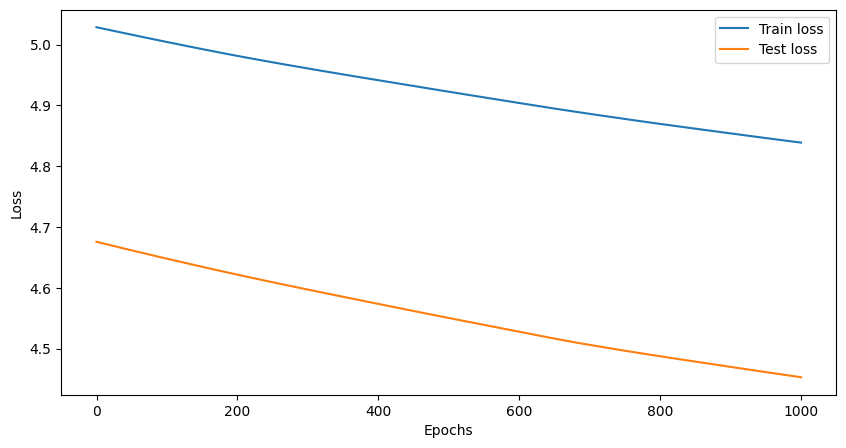

In [123]:
plot_stats(epochs_count, train_loss, test_loss)

In [124]:
y_preds = predict(model_1, X_test)

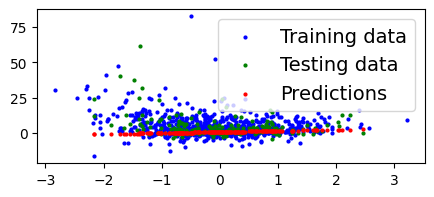

In [125]:
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_preds,
)


# **Model 5 (linear regression)**

In [126]:
data_copy = data.copy()
X = data_copy['x5']
y = data_copy['y']

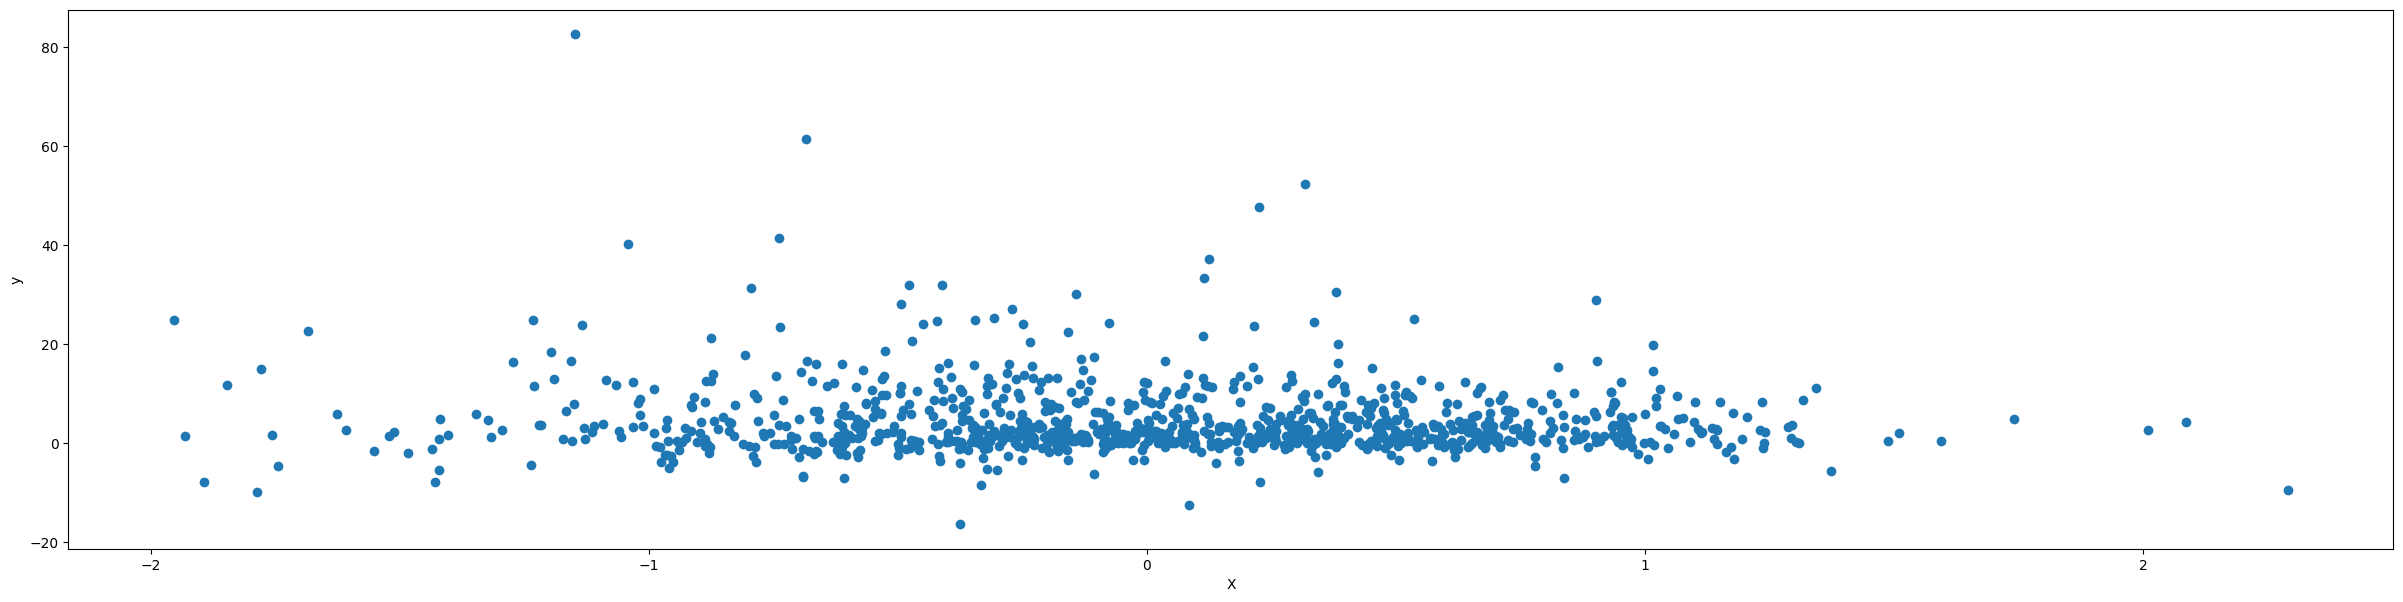

In [127]:
plt.figure(figsize = (30,7))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [128]:
splitter = int(0.8 * len(X))
X_train, y_train = X[:splitter], y[:splitter]
X_test, y_test = X[splitter:], y[splitter:]

print(f"Train Length: {len(X_train)}")
print(f"Test Length: {len(X_test)}")

Train Length: 800
Test Length: 200


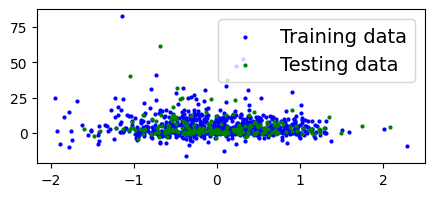

In [129]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

In [130]:
model_2= LinearRegressionModel()
print(f"Model_1 Parameters: {list(model_2.parameters())}")
print("---------")
print(f"Named Parameters: {model_2.state_dict()}")

Model_1 Parameters: [Parameter containing:
tensor([-0.0104], requires_grad=True), Parameter containing:
tensor([-0.9345], requires_grad=True)]
---------
Named Parameters: OrderedDict([('weights', tensor([-0.0104])), ('bias', tensor([-0.9345]))])


In [131]:
X_test = torch.tensor(X_test.to_numpy())
with torch.inference_mode():
    
    y_preds = model_2(X_test)
    y_preds=torch.tensor(y_preds)

print(f"Predicted value: {y_preds}")

Predicted value: tensor([-0.9406, -0.9337, -0.9387, -0.9321, -0.9339, -0.9331, -0.9391, -0.9385,
        -0.9239, -0.9339, -0.9384, -0.9421, -0.9463, -0.9199, -0.9253, -0.9267,
        -0.9294, -0.9479, -0.9355, -0.9392, -0.9323, -0.9394, -0.9425, -0.9384,
        -0.9240, -0.9249, -0.9399, -0.9409, -0.9344, -0.9288, -0.9315, -0.9312,
        -0.9374, -0.9318, -0.9380, -0.9242, -0.9392, -0.9421, -0.9280, -0.9405,
        -0.9484, -0.9383, -0.9301, -0.9335, -0.9262, -0.9368, -0.9392, -0.9272,
        -0.9218, -0.9337, -0.9327, -0.9336, -0.9306, -0.9255, -0.9283, -0.9332,
        -0.9301, -0.9237, -0.9285, -0.9416, -0.9191, -0.9358, -0.9289, -0.9252,
        -0.9306, -0.9317, -0.9307, -0.9246, -0.9417, -0.9290, -0.9461, -0.9283,
        -0.9293, -0.9285, -0.9375, -0.9358, -0.9350, -0.9238, -0.9303, -0.9380,
        -0.9392, -0.9342, -0.9562, -0.9406, -0.9270, -0.9370, -0.9334, -0.9375,
        -0.9366, -0.9373, -0.9357, -0.9431, -0.9355, -0.9388, -0.9298, -0.9473,
        -0.9347, -0.934

C:\Users\DELL\AppData\Local\Temp\ipykernel_12376\1225437667.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_preds=torch.tensor(y_preds)


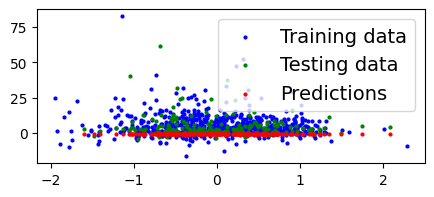

In [132]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [133]:
y_test=torch.tensor(y_test.to_numpy())
print(f"Loss in one parameter: {y_preds[0] - y_test[0]}")

Loss in one parameter: -4.2661874851374835


In [134]:
loss_function = nn.L1Loss()

In [135]:
optimizer = torch.optim.SGD(model_2.parameters(), # model parameters to optimize
                              lr=0.0001, # learning rate (how fast the model learns)
)

In [136]:
X_train = torch.tensor(X_train)
y_train=torch.tensor(y_train)
X_test = torch.tensor(X_test)
epochs_count, train_loss, test_loss = train(
                                        model_2, 
                                        train_data=X_train, 
                                        train_labels=y_train, 
                                        test_data=X_test, 
                                        test_labels=y_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer, 
                                        epochs=2000
                                    )

Epoch 0: MAE Loss: 5.81 | Test Loss: 5.50
Epoch 10: MAE Loss: 5.80 | Test Loss: 5.49
Epoch 20: MAE Loss: 5.79 | Test Loss: 5.49
Epoch 30: MAE Loss: 5.79 | Test Loss: 5.48
Epoch 40: MAE Loss: 5.78 | Test Loss: 5.47
Epoch 50: MAE Loss: 5.78 | Test Loss: 5.46
Epoch 60: MAE Loss: 5.77 | Test Loss: 5.46
Epoch 70: MAE Loss: 5.76 | Test Loss: 5.45
Epoch 80: MAE Loss: 5.76 | Test Loss: 5.44
Epoch 90: MAE Loss: 5.75 | Test Loss: 5.44
Epoch 100: MAE Loss: 5.75 | Test Loss: 5.43
Epoch 110: MAE Loss: 5.74 | Test Loss: 5.42
Epoch 120: MAE Loss: 5.74 | Test Loss: 5.42
Epoch 130: MAE Loss: 5.73 | Test Loss: 5.41
Epoch 140: MAE Loss: 5.72 | Test Loss: 5.40
Epoch 150: MAE Loss: 5.72 | Test Loss: 5.40
Epoch 160: MAE Loss: 5.71 | Test Loss: 5.39
Epoch 170: MAE Loss: 5.71 | Test Loss: 5.39
Epoch 180: MAE Loss: 5.70 | Test Loss: 5.38
Epoch 190: MAE Loss: 5.70 | Test Loss: 5.37
Epoch 200: MAE Loss: 5.69 | Test Loss: 5.37
Epoch 210: MAE Loss: 5.68 | Test Loss: 5.36
Epoch 220: MAE Loss: 5.68 | Test Loss: 5.35

C:\Users\DELL\AppData\Local\Temp\ipykernel_12376\1549213105.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test)


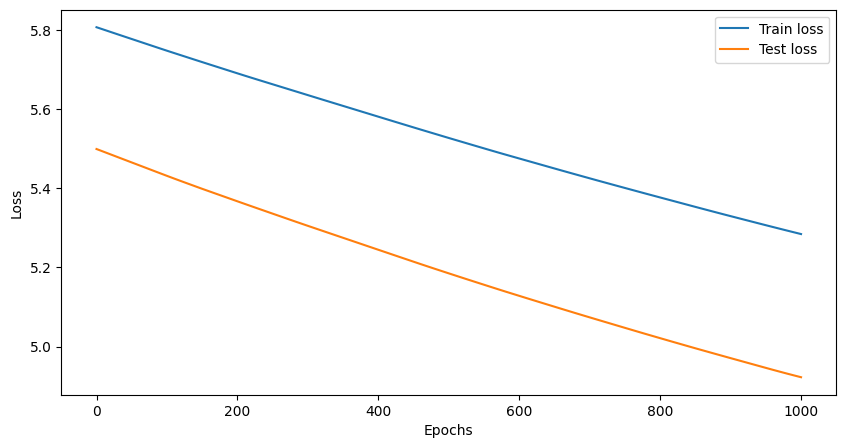

In [137]:
plot_stats(epochs_count, train_loss, test_loss)

In [138]:
y_preds = predict(model_2, X_test)

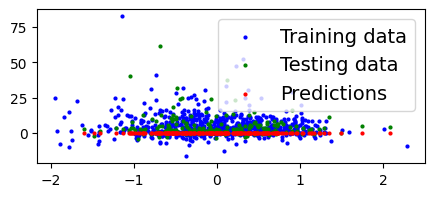

In [139]:
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_preds,
)

In [204]:
import torch
import torch.nn as nn

# import torch.nn.functional as F

# class PolynomialRegressionModel(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.poly = nn.Linear(1, 1)

#     def forward(self, x):
#         return F.relu(self.poly(x))

In [214]:

# model_5 =PolynomialRegressionModel()
# print(f"Model_5 Parameters: {list(model_5.parameters())}")
# # divider()
# print(f"Named Parameters: {model_5.state_dict()}")

Model_5 Parameters: [Parameter containing:
tensor([[0.7645]], requires_grad=True), Parameter containing:
tensor([0.8300], requires_grad=True)]
Named Parameters: OrderedDict([('poly.weight', tensor([[0.7645]])), ('poly.bias', tensor([0.8300]))])


In [222]:
# # Predict
# with torch.inference_mode():
#     X_test = torch.tensor(X_test.to_numpy())
#     y_preds = model_5(X_test)

# print(f"Predicted value: {y_preds}")

In [221]:
# optimizer = torch.optim.SGD(model_5.parameters(), # model parameters to optimize
#                               lr=0.001, # learning rate (how fast the model learns)
#                             )
# print (model_5.parameters())

In [220]:
# epochs_count, train_loss, test_loss = train(
#                                         model_5, 
#                                         train_data=X_train, 
#                                         train_labels=y_train, 
#                                         test_data=X_test, 
#                                         test_labels=y_test, 
#                                         loss_function=loss_function, 
#                                         optimizer=optimizer, 
#                                         epochs=1000
#                                     )

In [219]:
# plot_stats(epochs_count, train_loss, test_loss)

In [218]:
# y_preds = predict(model_5, X_test)